In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Step 2: Load the dataset
data = pd.read_csv("retail_sales_dataset.csv")

In [13]:
# Add a random Region column
regions = ['North', 'South', 'East', 'West']
data['Region'] = np.random.choice(regions, size=len(data))

# Save or use directly for analysis
print(data.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount Region  
0         3              50           150  South  
1         2             500          1000  North  
2         1              30            30  North  
3         1             500           500  South  
4         2              50           100  North  


In [15]:
# Step 3: Explore the dataset
print("First 5 rows of dataset:\n", data.head())
print("\nDataset Info:\n")
print(data.info())
print("\nSummary Statistics:\n", data.describe())

First 5 rows of dataset:
    Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount Region  
0         3              50           150  South  
1         2             500          1000  North  
2         1              30            30  North  
3         1             500           500  South  
4         2              50           100  North  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0 

In [19]:
# Step 4: Identify relevant variables
# Assuming dataset has columns: 'Region', 'Product_Category', 'Quantity', 'Sales_Amount'

# Step 5: Group by region and calculate total sales
region_sales = data.groupby('Region')['Total Amount'].sum().reset_index()
print("\nTotal Sales by Region:\n", region_sales)


Total Sales by Region:
   Region  Total Amount
0   East        126125
1  North        120325
2  South        103290
3   West        106260


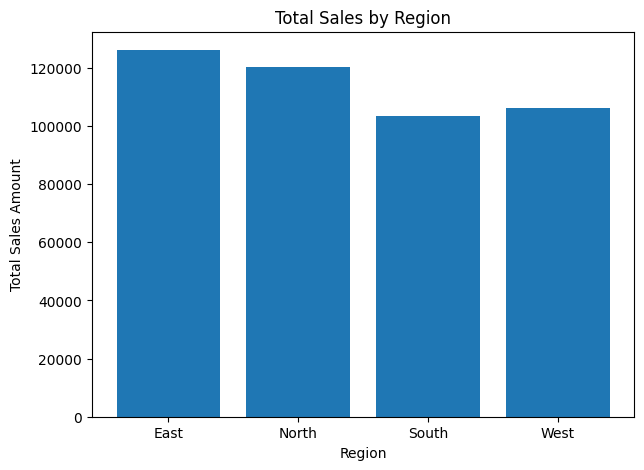

In [23]:
# Step 6: Visualize sales distribution by region (Bar Plot)
plt.figure(figsize=(7, 5))
plt.bar(region_sales['Region'], region_sales['Total Amount'])
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales Amount")
plt.show()

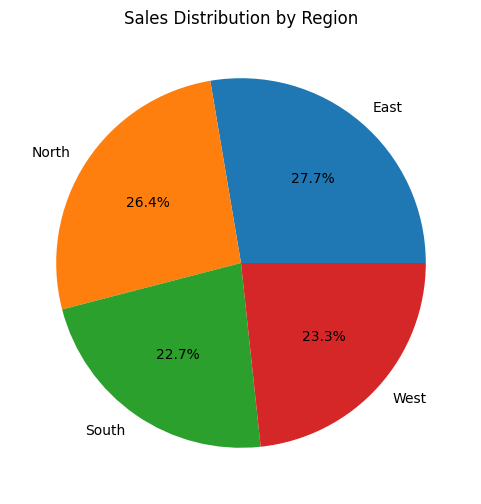

In [25]:
# Step 7: Pie chart for region-wise sales share
plt.figure(figsize=(6, 6))
plt.pie(region_sales['Total Amount'], labels=region_sales['Region'], autopct='%1.1f%%')
plt.title("Sales Distribution by Region")
plt.show()

In [29]:
# Step 8: Identify top-performing regions
top_regions = region_sales.sort_values(by='Total Amount', ascending=False)
print("\nTop Performing Regions:\n", top_regions.head())


Top Performing Regions:
   Region  Total Amount
0   East        126125
1  North        120325
3   West        106260
2  South        103290


In [33]:
# Step 9: Group data by region and product category
region_category_sales = data.groupby(['Region', 'Product Category'])['Total Amount'].sum().unstack()
print("\nSales by Region and Product Category:\n", region_category_sales)


Sales by Region and Product Category:
 Product Category  Beauty  Clothing  Electronics
Region                                         
East               36615     45425        44085
North              39090     34510        46725
South              36140     40845        26305
West               31670     34800        39790


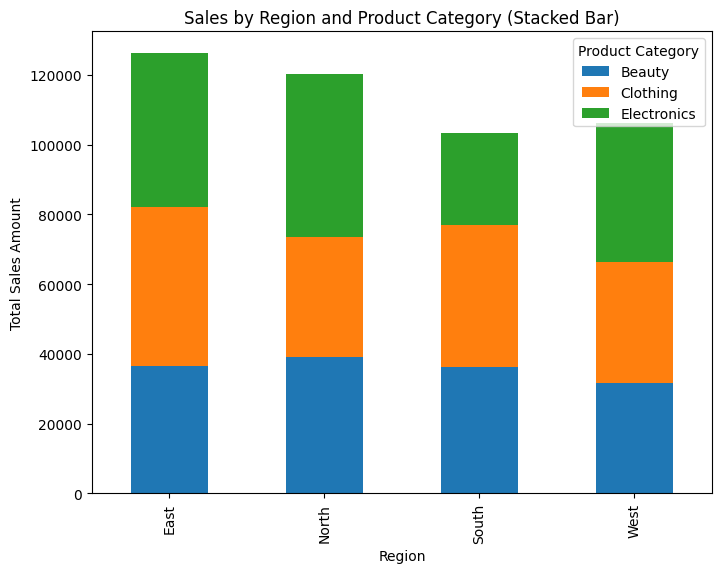

In [35]:
# Step 10: Visualize with stacked bar plot
region_category_sales.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title("Sales by Region and Product Category (Stacked Bar)")
plt.xlabel("Region")
plt.ylabel("Total Sales Amount")
plt.legend(title='Product Category')
plt.show()